In [69]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)

In [70]:
X = np.array([
    [5.1, 3.5],
    [4.9, 3.0],
    [5.8, 2.7],
    [6.0, 3.0],
    [6.7, 3.1],
    [4.5, 2.3],
    [6.1, 2.8],
    [5.2, 3.2],
    [5.5, 2.6],
    [5.0, 2.0],
    [8.0, 0.5],
    [7.5, 0.8],
    [8.1, -0.1],
    [2.5, 3.5],
    [1.0, 3.0],
    [4.5, -1.0],
    [3.0, -0.5],
    [5.1, -0.2],
    [6.0, -1.5],
    [3.5, -0.1],
    [4.0, 0.0],
    [6.1, 0.5],
    [5.4, -0.5],
    [5.3, 0.3],
    [5.8, 0.6]
])

u1 = np.array([3.0, 3.0])
u2 = np.array([2.0, 2.0])

#### Data points and Initial Means

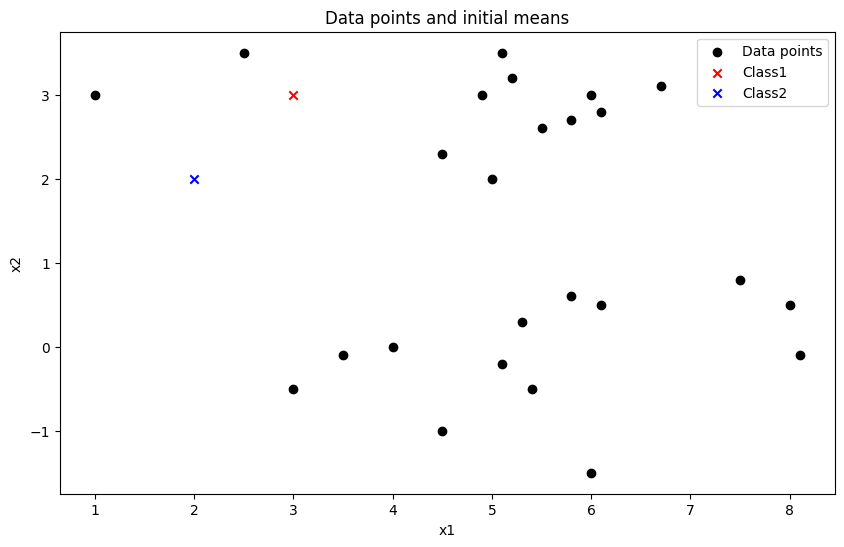

In [71]:
# Plot data points and initial means
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], color='black', label='Data points')
plt.scatter(u1[0], u1[1], color='red', marker='x', label='Class1')
plt.scatter(u2[0], u2[1], color='blue', marker='x', label='Class2')
plt.title('Data points and initial means')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

#### Method to calculate the distance between two points

In [72]:
def euclidean_distance(x, y):
    return np.sqrt(np.sum((x - y) ** 2))

#### K-means Algorithm for k = 2

In [73]:
# kmeans
ITERATIONS = 100
THRESHOLD = 1e-4

class1 = np.array([])
class2 = np.array([])

u1 = np.array([3.0, 3.0])
u2 = np.array([2.0, 2.0])

for _ in range(ITERATIONS):
    class1_temp = []
    class2_temp = []

    for x in X:
        d1 = euclidean_distance(x, u1)
        d2 = euclidean_distance(x, u2)

        if d1 < d2:
            class1_temp.append(x)
        else:
            class2_temp.append(x)

    class1_temp = np.array(class1_temp)
    class2_temp = np.array(class2_temp)

    new_u1 = u1
    new_u2 = u2

    if len(class1_temp) > 0:
        new_u1 = np.mean(class1_temp, axis=0)
    if len(class2_temp) > 0:
        new_u2 = np.mean(class2_temp, axis=0)

    if np.array_equal(class1, class1_temp) and np.array_equal(class2, class2_temp):
        break
    elif np.linalg.norm(new_u1 - u1) < THRESHOLD and np.linalg.norm(new_u2 - u2) < THRESHOLD:
        break
    else:
        u1 = new_u1
        u2 = new_u2
        class1 = class1_temp
        class2 = class2_temp

#### Data points and Final Means

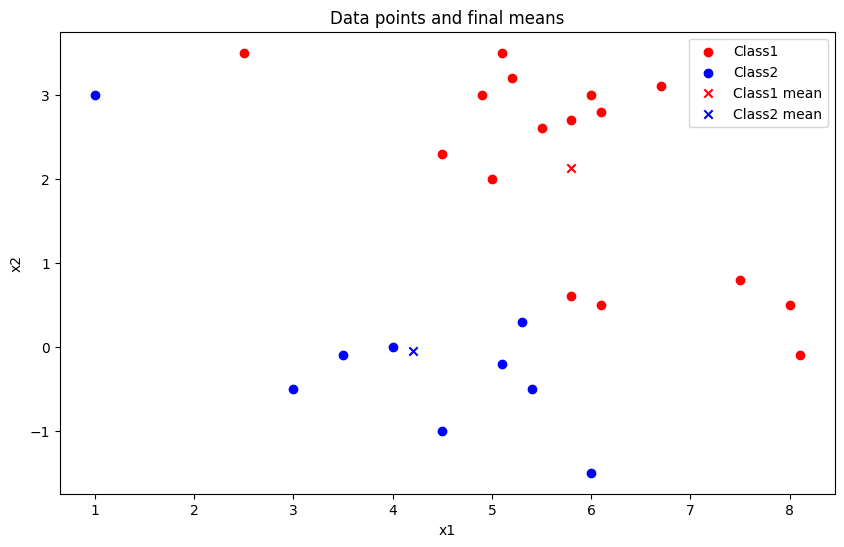

In [74]:
# Plot data points and final means
plt.figure(figsize=(10, 6))
if len(class1) > 0:
    plt.scatter(class1[:, 0], class1[:, 1], color='red', label='Class1')
if len(class2) > 0:
    plt.scatter(class2[:, 0], class2[:, 1], color='blue', label='Class2')

plt.scatter(u1[0], u1[1], color='red', marker='x', label='Class1 mean')
plt.scatter(u2[0], u2[1], color='blue', marker='x', label='Class2 mean')

plt.title('Data points and final means')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

In [75]:
print("Mean of class1: ", u1)
print("Mean of class2: ", u2)

Mean of class1:  [5.8   2.125]
Mean of class2:  [ 4.2        -0.05555556]


Final Centroids are:\
u1 = (`5.8`, `2.125`)\
u2 = (`4.2`, `-0.05555556`)

#### Initialising random centroids from the data points and performing K-means Algorithm for k = 2

Iteration 1


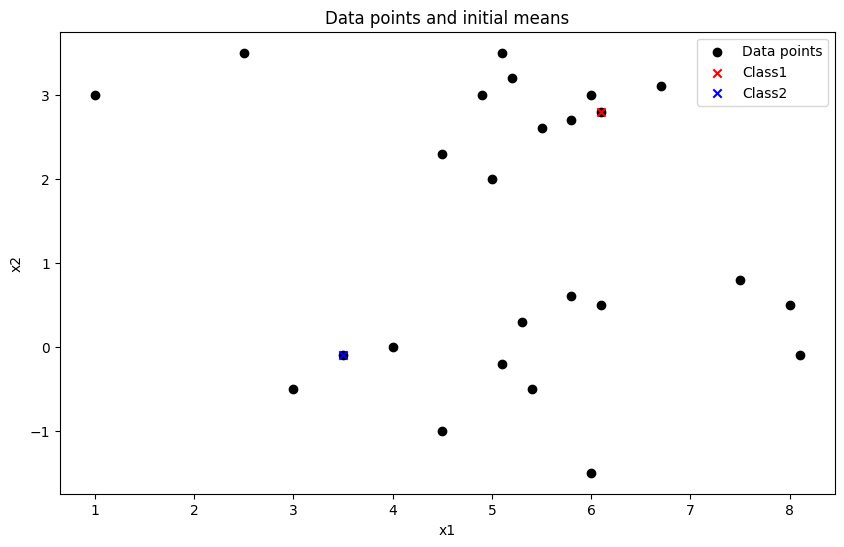

Random mean of class1:  [6.1 2.8]
Random mean of class2:  [ 3.5 -0.1]


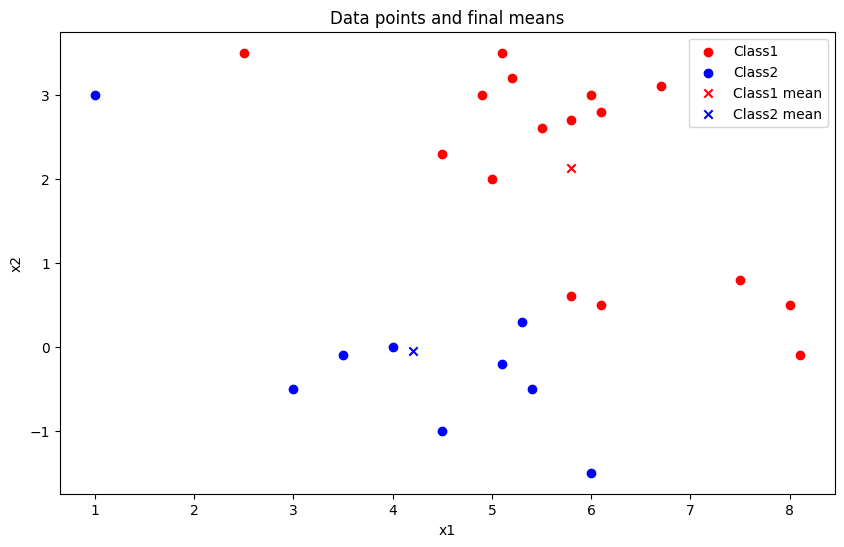

Mean of class1:  [5.8   2.125]
Mean of class2:  [ 4.2        -0.05555556]
Iteration 2


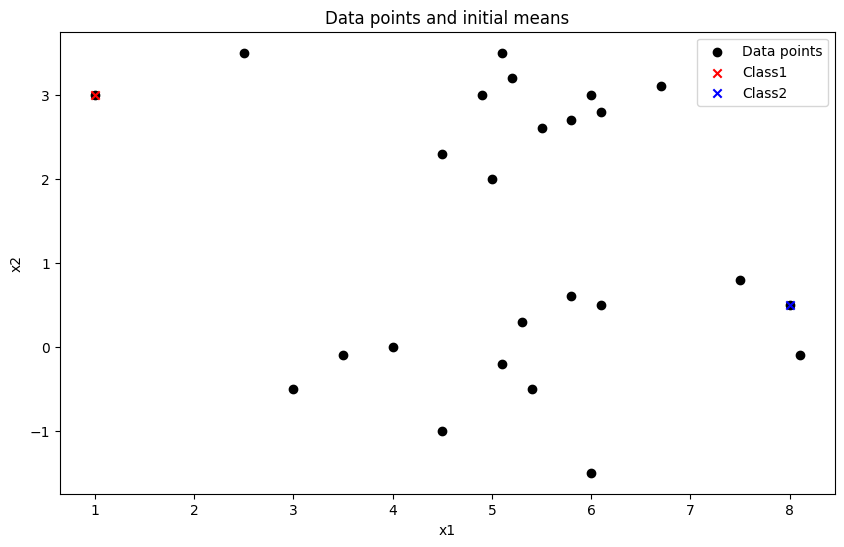

Random mean of class1:  [1. 3.]
Random mean of class2:  [8.  0.5]


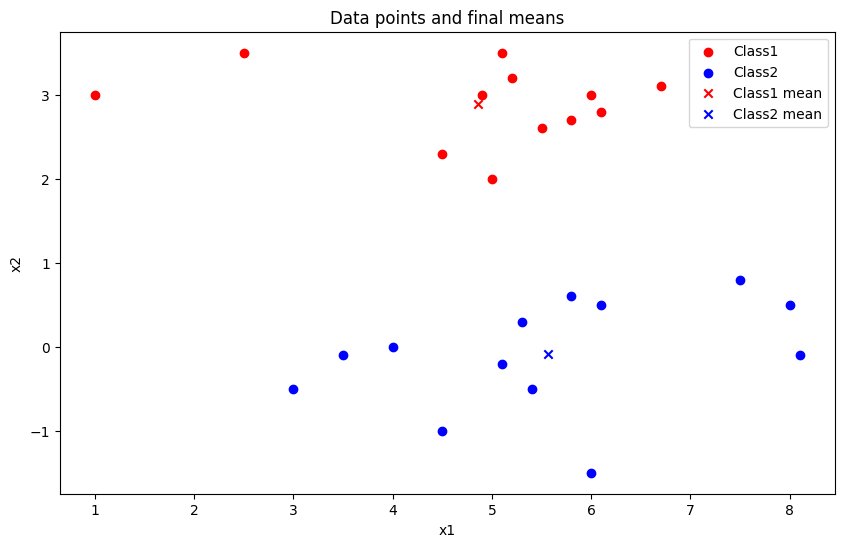

Mean of class1:  [4.85833333 2.89166667]
Mean of class2:  [ 5.56153846 -0.09230769]
Iteration 3


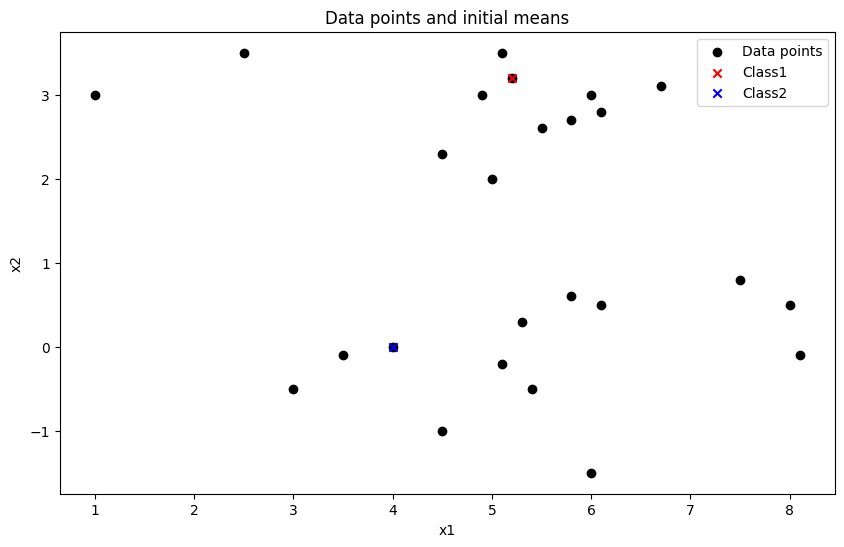

Random mean of class1:  [5.2 3.2]
Random mean of class2:  [4. 0.]


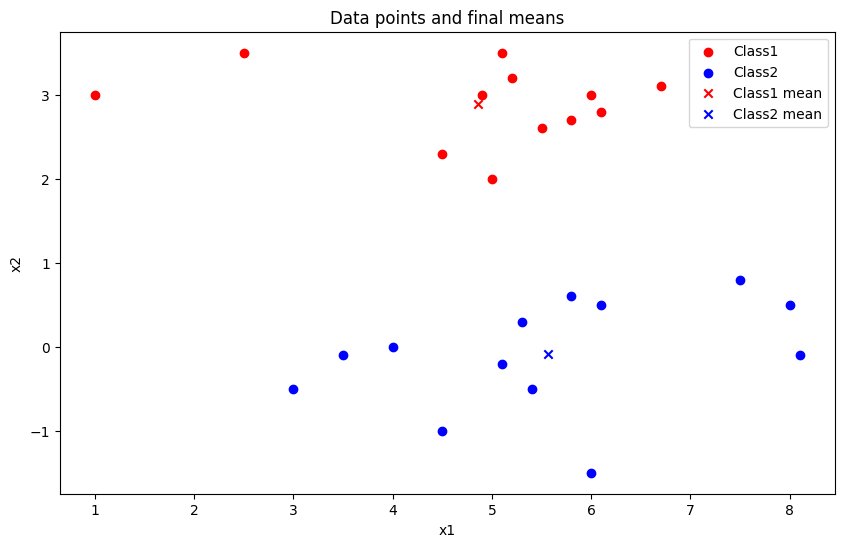

Mean of class1:  [4.85833333 2.89166667]
Mean of class2:  [ 5.56153846 -0.09230769]
Iteration 4


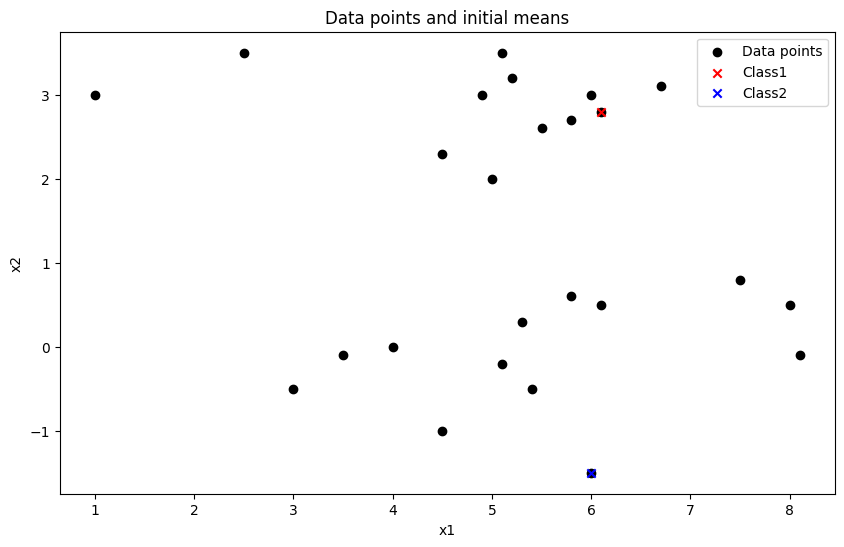

Random mean of class1:  [6.1 2.8]
Random mean of class2:  [ 6.  -1.5]


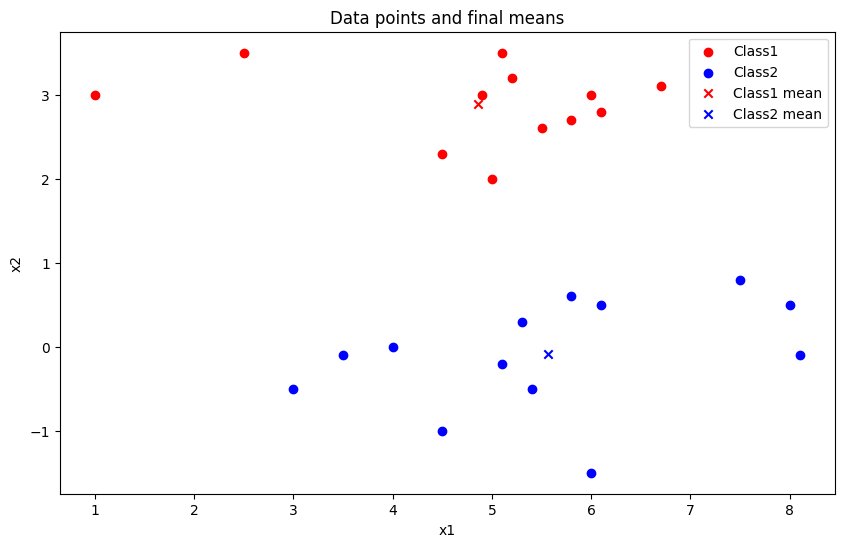

Mean of class1:  [4.85833333 2.89166667]
Mean of class2:  [ 5.56153846 -0.09230769]
Iteration 5


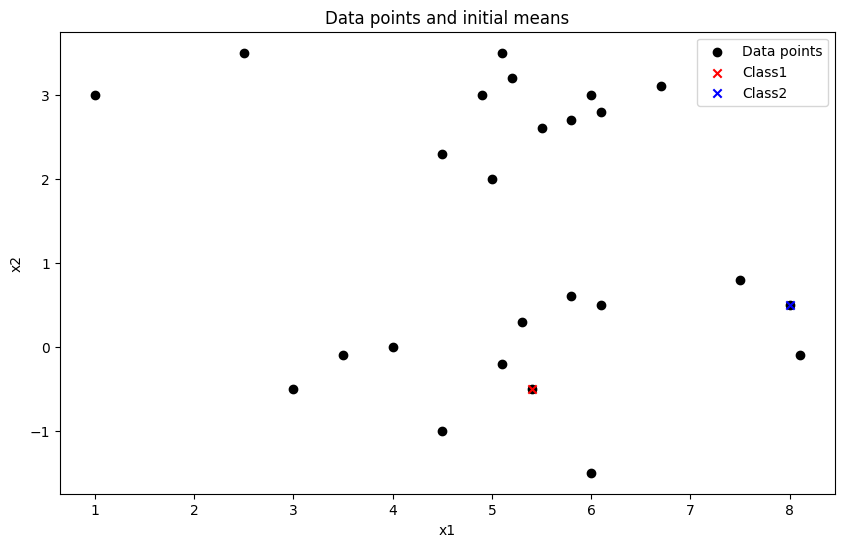

Random mean of class1:  [ 5.4 -0.5]
Random mean of class2:  [8.  0.5]


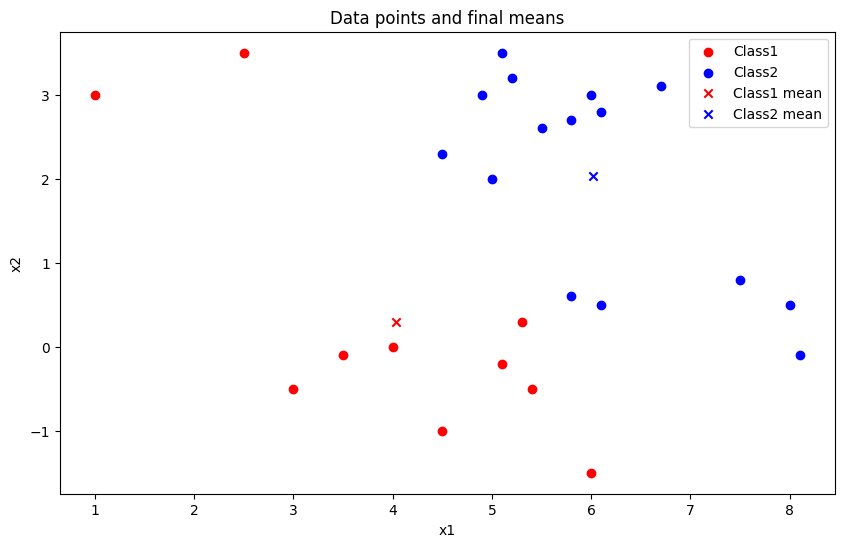

Mean of class1:  [4.03 0.3 ]
Mean of class2:  [6.02       2.03333333]
Iteration 6


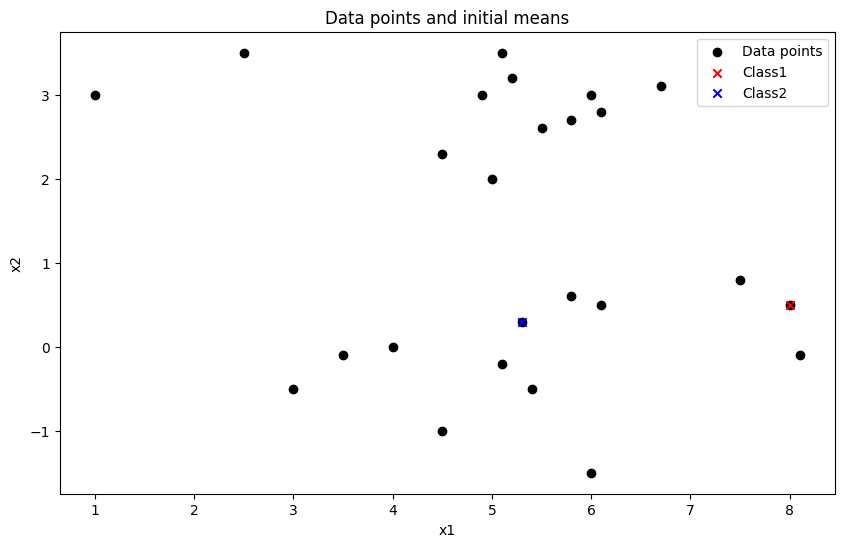

Random mean of class1:  [8.  0.5]
Random mean of class2:  [5.3 0.3]


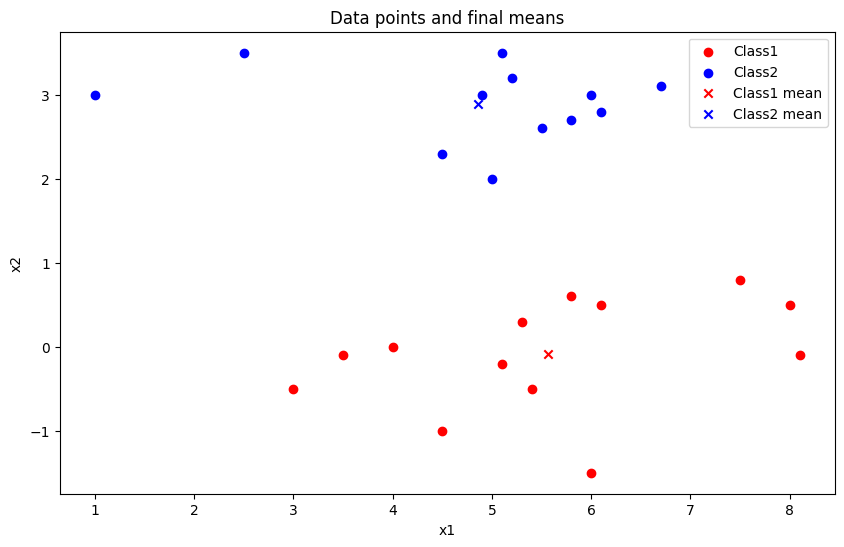

Mean of class1:  [ 5.56153846 -0.09230769]
Mean of class2:  [4.85833333 2.89166667]


In [76]:
for _ in range(6):
    print("Iteration", _ + 1)

    class1_rand = np.array([])
    class2_rand = np.array([])

    u1_rand = np.array([])
    u2_rand = np.array([])

    u1_rand = X[np.random.randint(0, X.shape[0])]
    u2_rand = X[np.random.randint(0, X.shape[0])]
    while np.array_equal(u2_rand, u1_rand):
        u2_rand = X[np.random.randint(0, X.shape[0])]

    # Plot data points and initial means
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], color='black', label='Data points')
    plt.scatter(u1_rand[0], u1_rand[1], color='red', marker='x', label='Class1')
    plt.scatter(u2_rand[0], u2_rand[1], color='blue', marker='x', label='Class2')
    plt.title('Data points and initial means')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

    print("Random mean of class1: ", u1_rand)
    print("Random mean of class2: ", u2_rand)

    for _ in range(ITERATIONS):
        class1_temp = []
        class2_temp = []

        for x in X:
            d1 = euclidean_distance(x, u1_rand)
            d2 = euclidean_distance(x, u2_rand)

            if d1 < d2:
                class1_temp.append(x)
            else:
                class2_temp.append(x)

        class1_temp = np.array(class1_temp)
        class2_temp = np.array(class2_temp)

        new_u1 = u1_rand
        new_u2 = u2_rand

        if len(class1_temp) > 0:
            new_u1 = np.mean(class1_temp, axis=0)
        if len(class2_temp) > 0:
            new_u2 = np.mean(class2_temp, axis=0)

        if np.array_equal(class1_rand, class1_temp) and np.array_equal(class2_rand, class2_temp):
            break
        elif np.linalg.norm(new_u1 - u1_rand) < THRESHOLD and np.linalg.norm(new_u2 - u2_rand) < THRESHOLD:
            break
        else:
            u1_rand = new_u1
            u2_rand = new_u2
            class1_rand = class1_temp
            class2_rand = class2_temp

    # Plot data points and final means
    plt.figure(figsize=(10, 6))
    if len(class1_rand) > 0:
        plt.scatter(class1_rand[:, 0], class1_rand[:, 1], color='red', label='Class1')
    if len(class2_rand) > 0:
        plt.scatter(class2_rand[:, 0], class2_rand[:, 1], color='blue', label='Class2')

    plt.scatter(u1_rand[0], u1_rand[1], color='red', marker='x', label='Class1 mean')
    plt.scatter(u2_rand[0], u2_rand[1], color='blue', marker='x', label='Class2 mean')

    plt.title('Data points and final means')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

    print("Mean of class1: ", u1_rand)
    print("Mean of class2: ", u2_rand)

#### Initialising random centroids uniformly between the minimum and maximum values of the data points and performing K-means Algorithm for k = 2

Iteration 1


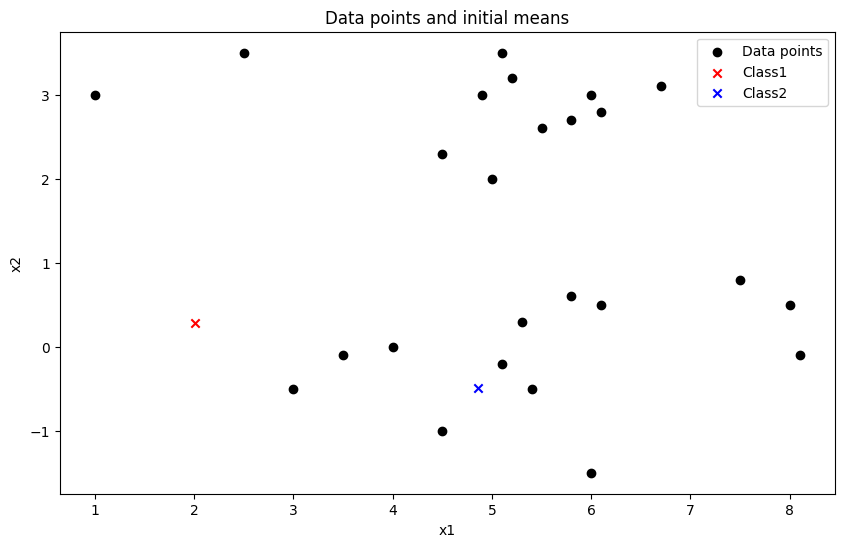

Random mean of class1:  [2.0033775  0.28580136]
Random mean of class2:  [ 4.85799626 -0.49229579]


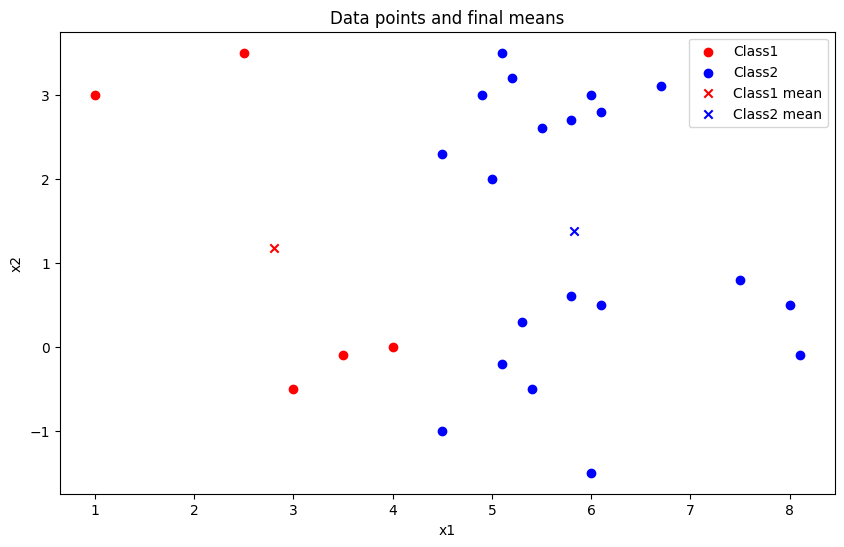

Mean of class1:  [2.8  1.18]
Mean of class2:  [5.83 1.38]
Iteration 2


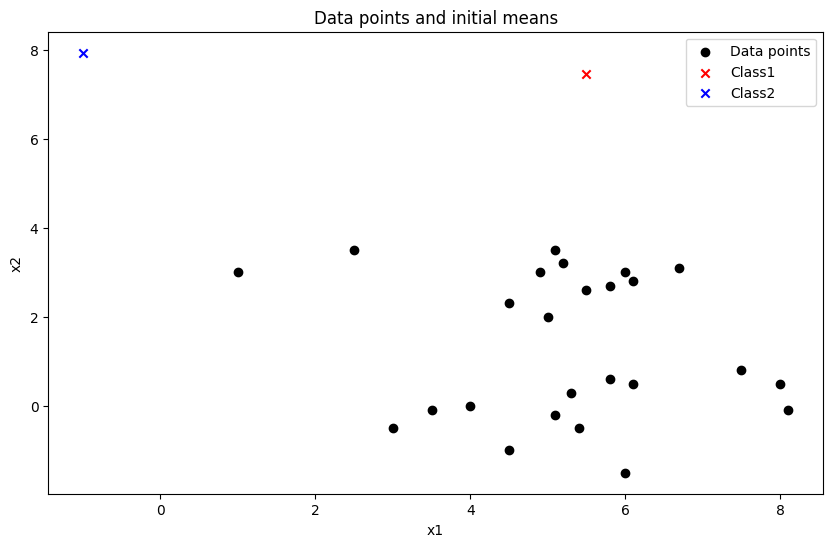

Random mean of class1:  [5.49798895 7.44697438]
Random mean of class2:  [-0.99299111  7.92990403]


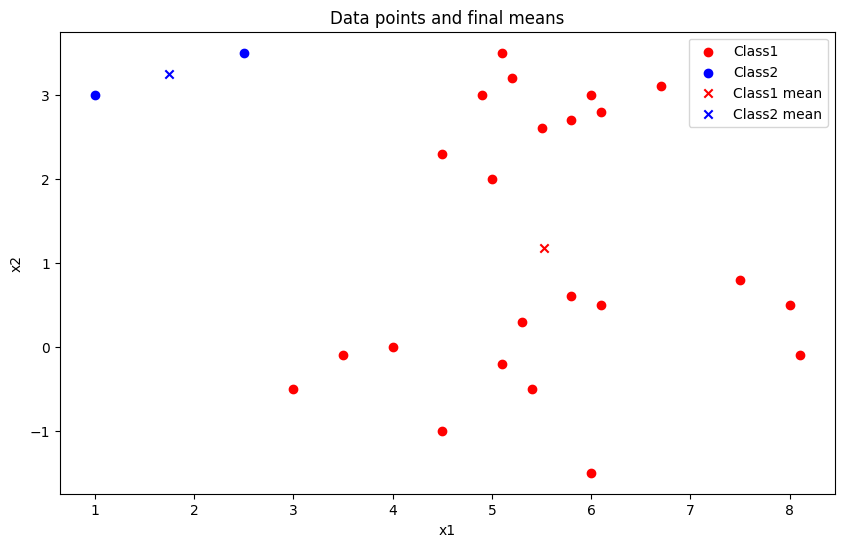

Mean of class1:  [5.52608696 1.17391304]
Mean of class2:  [1.75 3.25]
Iteration 3


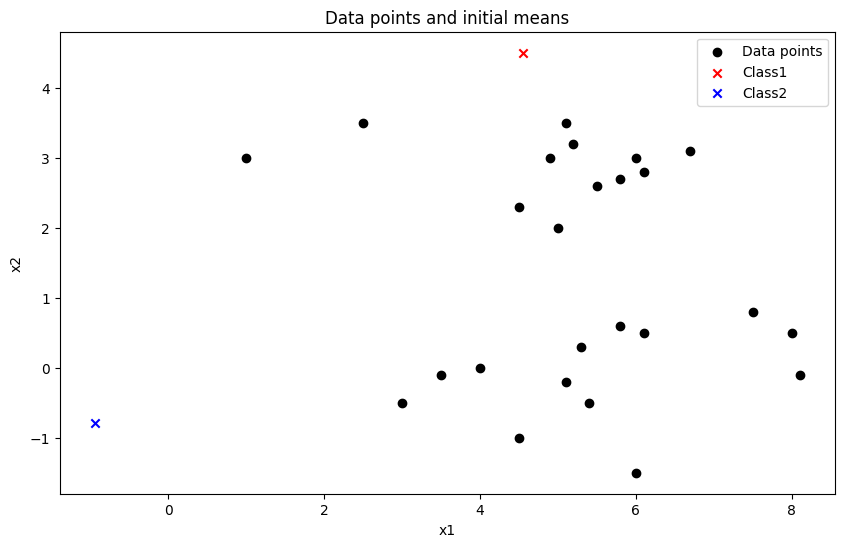

Random mean of class1:  [4.55733359 4.50487844]
Random mean of class2:  [-0.93640325 -0.79243817]


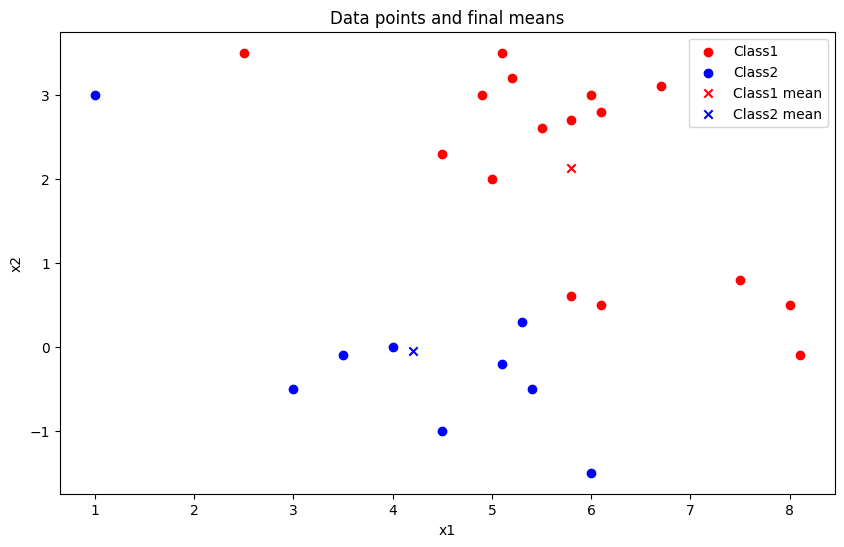

Mean of class1:  [5.8   2.125]
Mean of class2:  [ 4.2        -0.05555556]
Iteration 4


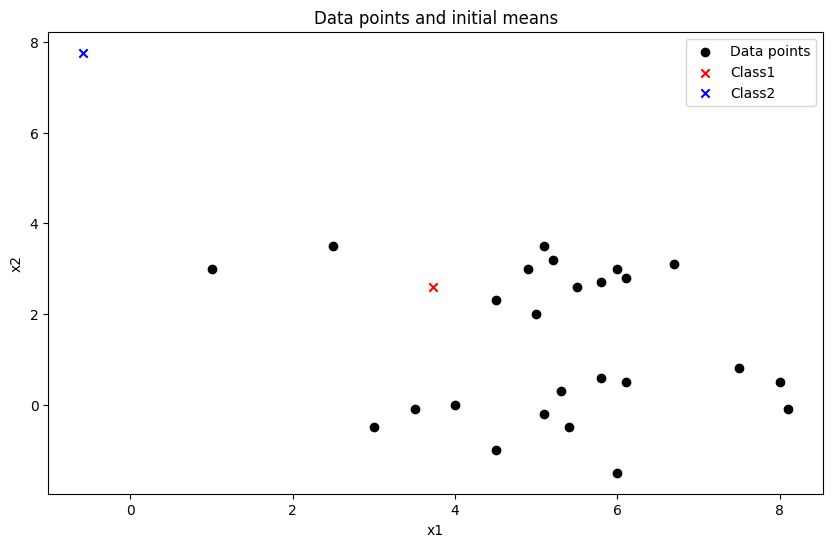

Random mean of class1:  [3.72297194 2.59874875]
Random mean of class2:  [-0.58000903  7.76379967]


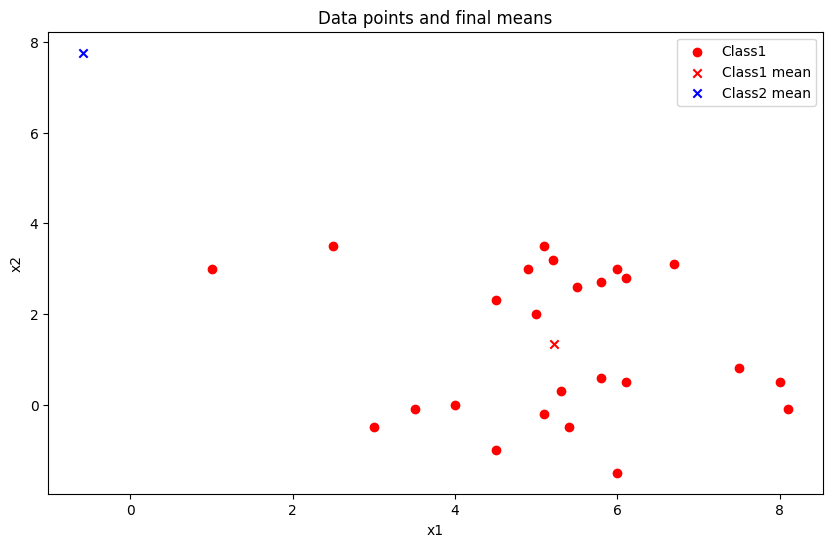

Mean of class1:  [5.224 1.34 ]
Mean of class2:  [-0.58000903  7.76379967]
Iteration 5


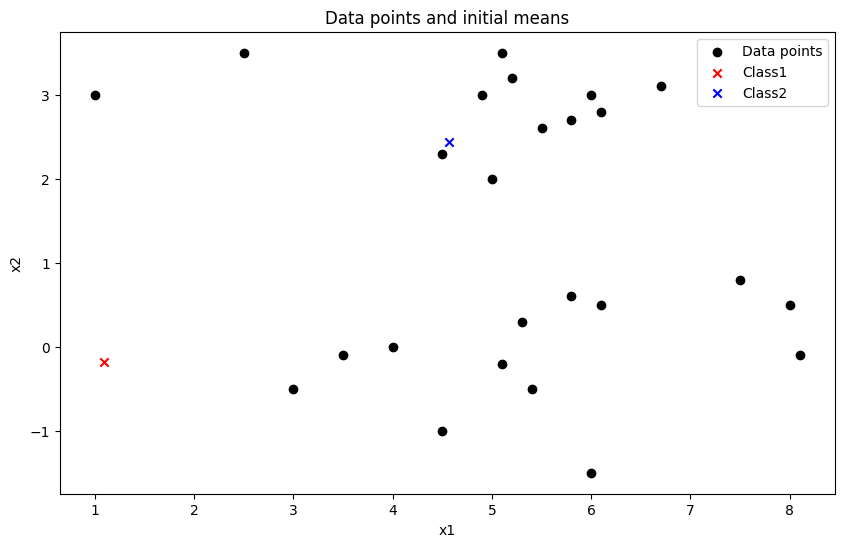

Random mean of class1:  [ 1.09494206 -0.18454209]
Random mean of class2:  [4.56547408 2.44215792]


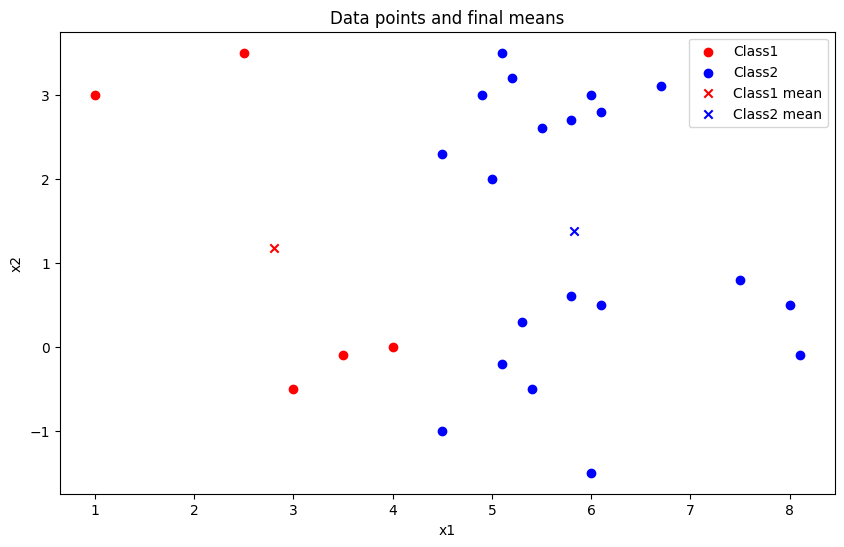

Mean of class1:  [2.8  1.18]
Mean of class2:  [5.83 1.38]
Iteration 6


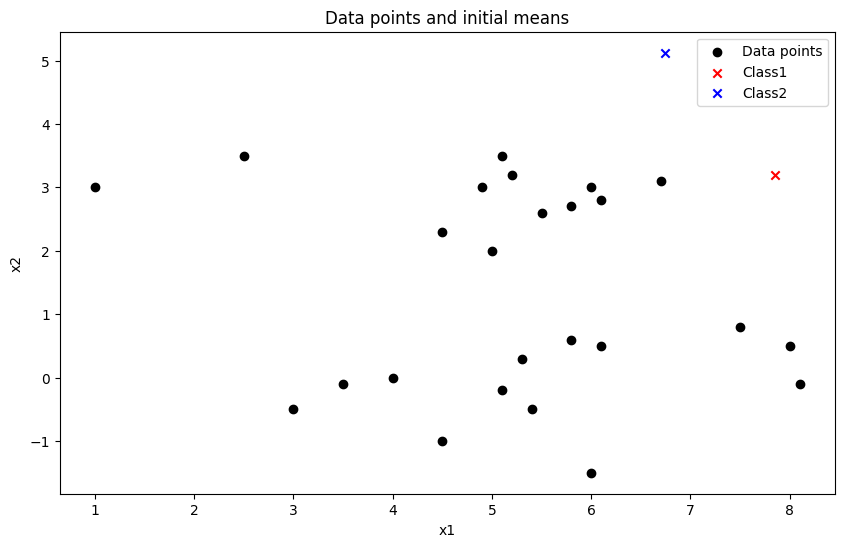

Random mean of class1:  [7.84907797 3.20086604]
Random mean of class2:  [6.73946366 5.12276785]


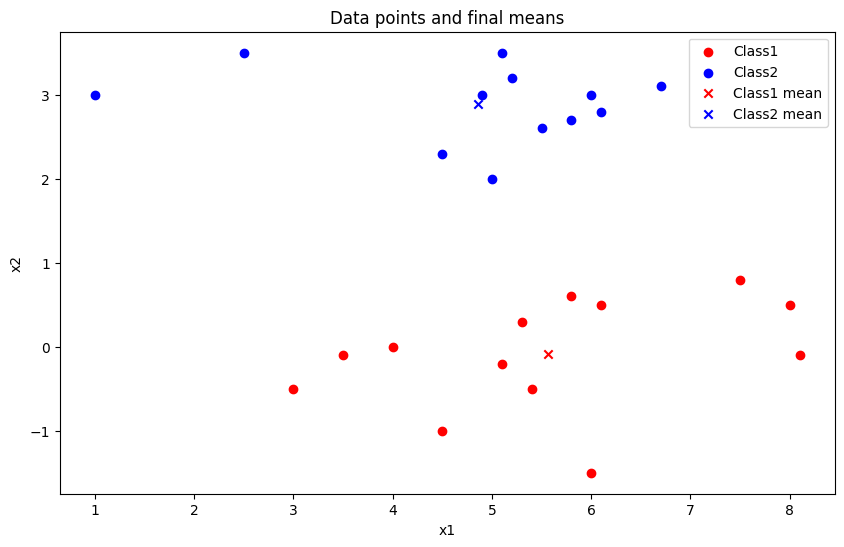

Mean of class1:  [ 5.56153846 -0.09230769]
Mean of class2:  [4.85833333 2.89166667]


In [77]:
for _ in range(6):
    print("Iteration", _ + 1)

    class1_rand = np.array([])
    class2_rand = np.array([])

    u1_rand = np.array([])
    u2_rand = np.array([])

    u1_rand = np.random.uniform(-1, 8, 2)
    u2_rand = np.random.uniform(-1, 8, 2)

    # Plot data points and initial means
    plt.figure(figsize=(10, 6))
    plt.scatter(X[:, 0], X[:, 1], color='black', label='Data points')
    plt.scatter(u1_rand[0], u1_rand[1], color='red', marker='x', label='Class1')
    plt.scatter(u2_rand[0], u2_rand[1], color='blue', marker='x', label='Class2')
    plt.title('Data points and initial means')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

    print("Random mean of class1: ", u1_rand)
    print("Random mean of class2: ", u2_rand)

    for _ in range(ITERATIONS):
        class1_temp = []
        class2_temp = []

        for x in X:
            d1 = euclidean_distance(x, u1_rand)
            d2 = euclidean_distance(x, u2_rand)

            if d1 < d2:
                class1_temp.append(x)
            else:
                class2_temp.append(x)

        class1_temp = np.array(class1_temp)
        class2_temp = np.array(class2_temp)

        new_u1 = u1_rand
        new_u2 = u2_rand

        if len(class1_temp) > 0:
            new_u1 = np.mean(class1_temp, axis=0)
        if len(class2_temp) > 0:
            new_u2 = np.mean(class2_temp, axis=0)

        if np.array_equal(class1_rand, class1_temp) and np.array_equal(class2_rand, class2_temp):
            break
        elif np.linalg.norm(new_u1 - u1_rand) < THRESHOLD and np.linalg.norm(new_u2 - u2_rand) < THRESHOLD:
            break
        else:
            u1_rand = new_u1
            u2_rand = new_u2
            class1_rand = class1_temp
            class2_rand = class2_temp

    # Plot data points and final means
    plt.figure(figsize=(10, 6))
    if len(class1_rand) > 0:
        plt.scatter(class1_rand[:, 0], class1_rand[:, 1], color='red', label='Class1')
    if len(class2_rand) > 0:
        plt.scatter(class2_rand[:, 0], class2_rand[:, 1], color='blue', label='Class2')

    plt.scatter(u1_rand[0], u1_rand[1], color='red', marker='x', label='Class1 mean')
    plt.scatter(u2_rand[0], u2_rand[1], color='blue', marker='x', label='Class2 mean')

    plt.title('Data points and final means')
    plt.xlabel('x1')
    plt.ylabel('x2')
    plt.legend()
    plt.show()

    print("Mean of class1: ", u1_rand)
    print("Mean of class2: ", u2_rand)

We see that when the centroids are initialised randomly from the data points, for all 6 iterations the final centroids as well as the clusters are close to the ones obtained when the centroids were initialised as provided in the question $u1 = (3.0, 3.0), u2 = (2.0, 2.0)$\
On the other hand, when the centroids are initialised uniformly between the minimum and maximum values of the data points, the final centroids as well as the clusters are different from the ones obtained when the centroids were initialised as provided in the question $u1 = (3.0, 3.0), u2 = (2.0, 2.0)$ as well as significantly different for each iteration as well.

#### Elbow Method:
The Elbow Method is a heuristic method used to determine the optimal number of clusters in a dataset. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use. The explained variation is the sum of squared distances between each data point and the centroid of the cluster to which the data point belongs(WCSS). The elbow of the curve is the point where the explained variation starts to decrease in a linear fashion. The Elbow Method is useful when the number of clusters is not known a priori.

In [78]:
# Elbow method
def kmeans(X, k, iterations=100, threshold=1e-4, seed=42):
    np.random.seed(seed)
    centroids_orig = X[np.random.choice(X.shape[0], k, replace=False)]
    centroids = centroids_orig

    classes = [np.array([[]]) for _ in range(k)]

    for _ in range(ITERATIONS):
        classes_temp = [np.array([[]]) for _ in range(k)]

        for x in X:
            distances = [euclidean_distance(x, c) for c in centroids]
            class_ind = np.argmin(distances)
            classes_temp[class_ind] = np.append(classes_temp[class_ind], [x]).reshape(-1, 2)

        new_centroids = np.array([np.mean(cluster, axis=0) if len(cluster) > 0 else centroids[i]
                                  for i, cluster in enumerate(classes_temp)])

        if np.array_equal(classes, classes_temp):
            break
        elif np.all([np.linalg.norm(new_centroids[i] - centroids[i]) < threshold for i in range(k)]):
            break
        else:
            centroids = new_centroids
            classes = classes_temp

    return centroids, centroids_orig, classes

def elbow_method(X, k_max, seed=42):
    wcss = []

    for k in range(1, k_max + 1):
        centroids, _, classes = kmeans(X, k, seed=seed)
        wcss.append(np.sum([np.sum([euclidean_distance(x, centroid) for x in class_]) for centroid, class_ in zip(centroids, classes)]))

    plt.figure(figsize=(10, 6))
    plt.plot(range(1, k_max + 1), wcss, marker='o')
    plt.title('Elbow method')
    plt.xlabel('k (Number of clusters)')
    plt.ylabel('WCSS (Within-cluster sum of squares)')
    plt.tight_layout()
    plt.show()

    # print("Most optimal k: ", np.argmin(np.diff(wcss)) + 1)

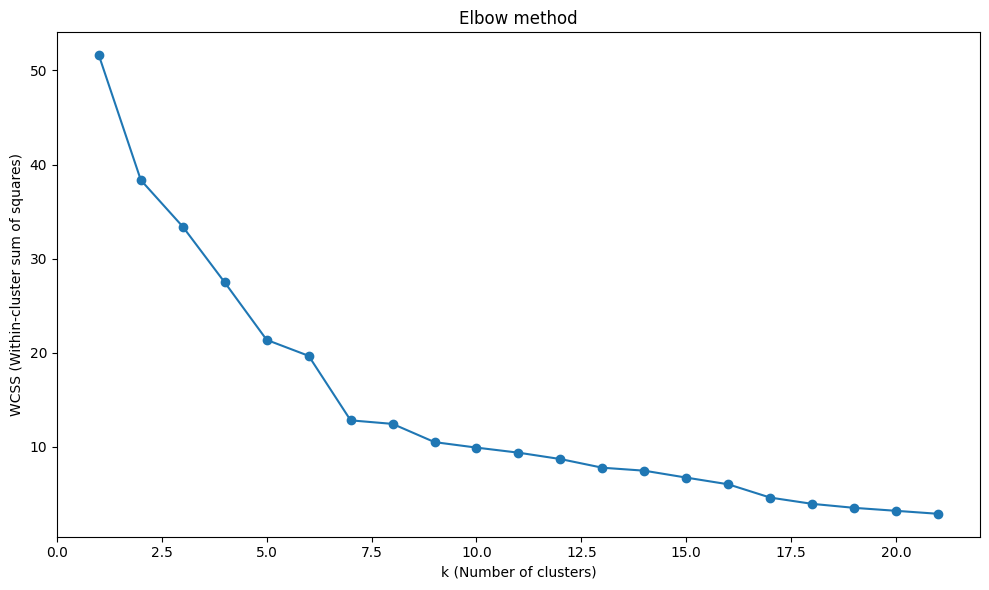

In [79]:
elbow_method(X, 21)

From the above plot we can say that after k = `7`, the WCSS starts decreasing in a linear fashion i.e. the elbow of the plot is `7`. So, according to the elbow method the optimal number of clusters for our matrix should be `7`.

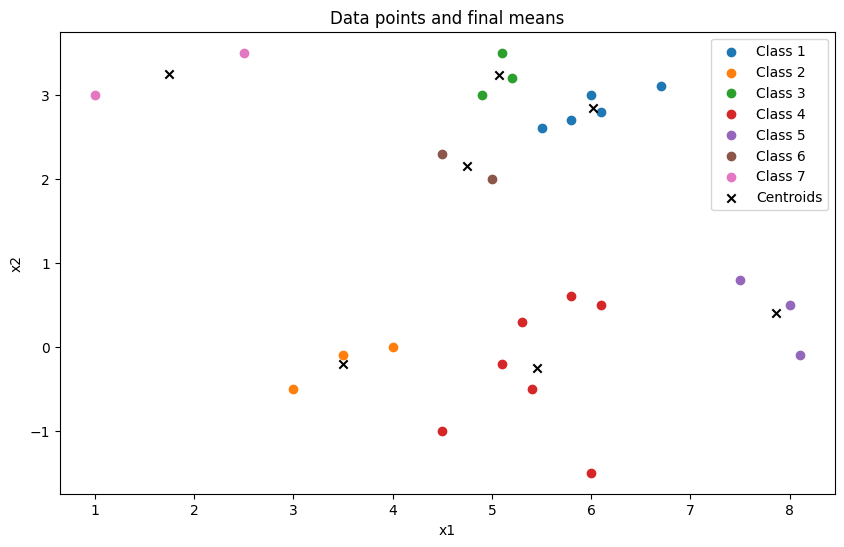

In [80]:
centroids, _, classes = kmeans(X, 7, seed=42)

plt.figure(figsize=(10, 6))
for i, class_ in enumerate(classes):
    plt.scatter(class_[:, 0], class_[:, 1], label=f'Class {i + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label='Centroids')
plt.title('Data points and final means')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

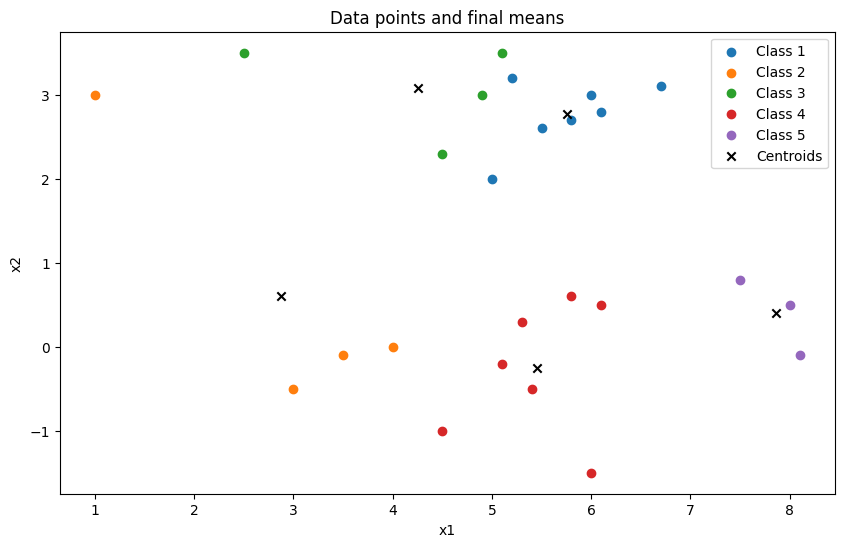

In [86]:
centroids, _, classes = kmeans(X, 5, seed=42)

plt.figure(figsize=(10, 6))
for i, class_ in enumerate(classes):
    plt.scatter(class_[:, 0], class_[:, 1], label=f'Class {i + 1}')
plt.scatter(centroids[:, 0], centroids[:, 1], color='black', marker='x', label='Centroids')
plt.title('Data points and final means')
plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()